<a href="https://colab.research.google.com/github/Amirrss/Prac/blob/main/7_1_tensorflow_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network (CNN)

This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this tutorial uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training your model will take just a few lines of code.


### Import TensorFlow

In [ ]:
import tensorflow as tf
from keras.utils.vis_utils import plot_model

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


2023-02-27 23:48:40.793921: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 23:48:40.927077: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.4/lib64:
2023-02-27 23:48:40.927095: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-27 23:48:41.666749: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open share

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


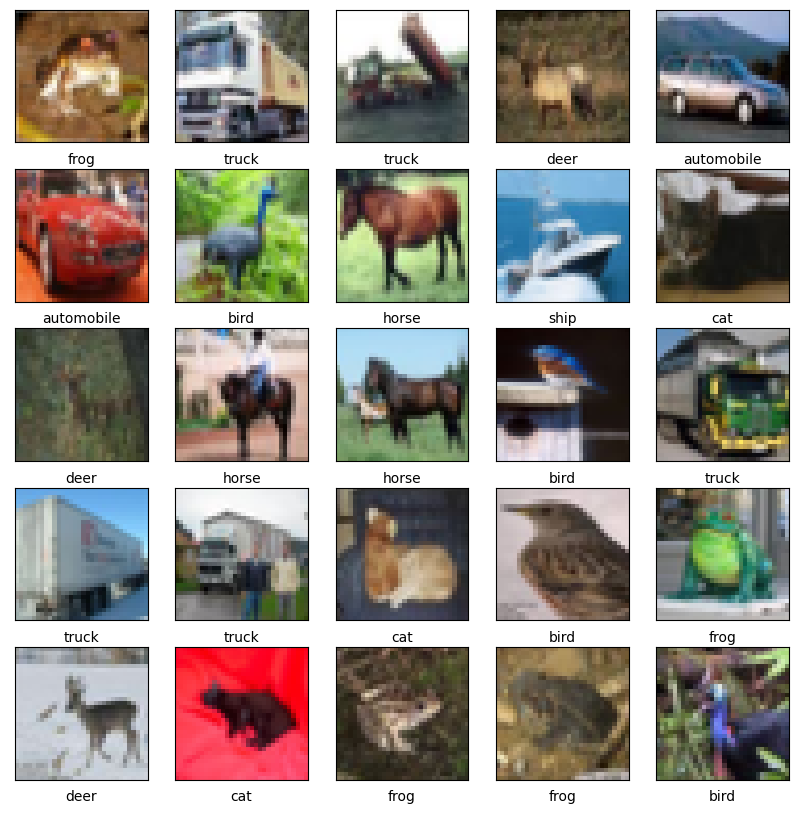

In [ ]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


In [ ]:
class CNNModel(tf.keras.Model):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = layers.Conv2D(
            32, (3, 3), activation="relu", input_shape=(32, 32, 3)
        )
        self.pool1 = layers.MaxPooling2D((2, 2))
        self.conv2 = layers.Conv2D(64, (3, 3), activation="relu")
        self.pool2 = layers.MaxPooling2D((2, 2))
        self.conv3 = layers.Conv2D(64, (3, 3), activation="relu")
        self.flatten = layers.Flatten()
        self.dense1 = layers.Dense(64, activation="relu")
        self.dense2 = layers.Dense(10)

    def call(self, input_tensor):
        conv1_output = self.conv1(input_tensor)
        pool1_output = self.pool1(conv1_output)
        conv2_output = self.conv2(pool1_output)
        pool2_output = self.pool2(conv2_output)
        conv3_output = self.conv3(pool2_output)
        flattened_vector = self.flatten(conv3_output)
        dense1_output = self.dense1(flattened_vector)
        dense2_output = self.dense2(dense1_output)
        return dense2_output


model = CNNModel()
model.build(input_shape=(None, 32, 32, 3))
model.summary()

2023-02-27 23:48:45.211575: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 23:48:45.211791: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.4/lib64:
2023-02-27 23:48:45.211853: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.4/lib64:
2023-02-27 23:48:45.211910: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot o

Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  896       
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           multiple                  18496     
                                                                 
 max_pooling2d_1 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           multiple                  36928     
                                                                 
 flatten (Flatten)           multiple                  0 

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

Let's display the architecture of your model so far:

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))

Here's the complete architecture of your model:

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0

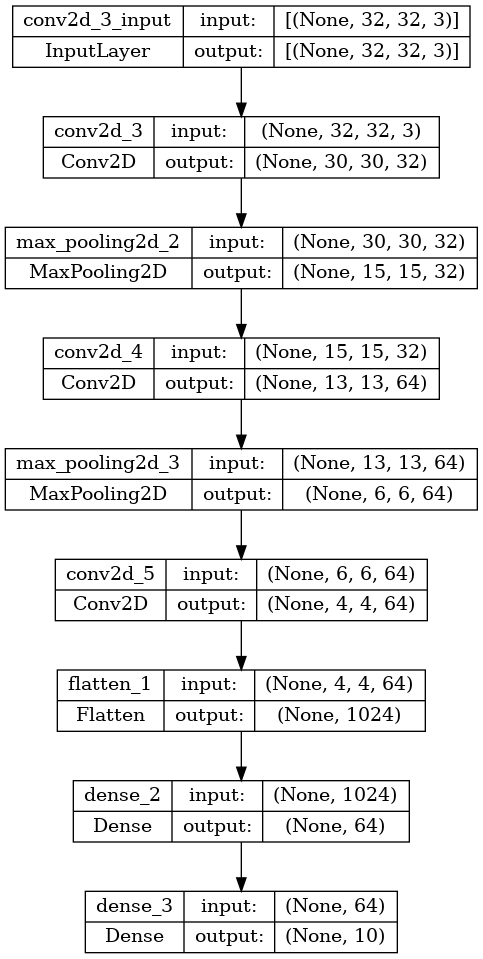

In [ ]:
plot_model(model=model, show_shapes=True, expand_nested=True)


The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

history = model.fit(
    train_images, train_labels, epochs=10, validation_data=(test_images, test_labels)
)

Epoch 1/10


2023-02-27 23:48:46.408010: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 27s 16ms/step - loss: 1.5229 - accuracy: 0.4426 - val_loss: 1.2412 - val_accuracy: 0.5558
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1446 - accuracy: 0.5973 - val_loss: 1.0847 - val_accuracy: 0.6193
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9961 - accuracy: 0.6494 - val_loss: 0.9656 - val_accuracy: 0.6676
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9008 - accuracy: 0.6861 - val_loss: 0.9560 - val_accuracy: 0.6661
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8334 - accuracy: 0.7076 - val_loss: 0.8739 - val_accuracy: 0.6950
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7755 - accuracy: 0.7284 - val_loss: 0.8768 - val_accuracy: 0.6983
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7321 - accuracy: 0.7438 - val_loss: 0.8708 - val_accura

### Evaluate the model

313/313 - 1s - loss: 0.9060 - accuracy: 0.7032 - 1s/epoch - 4ms/step


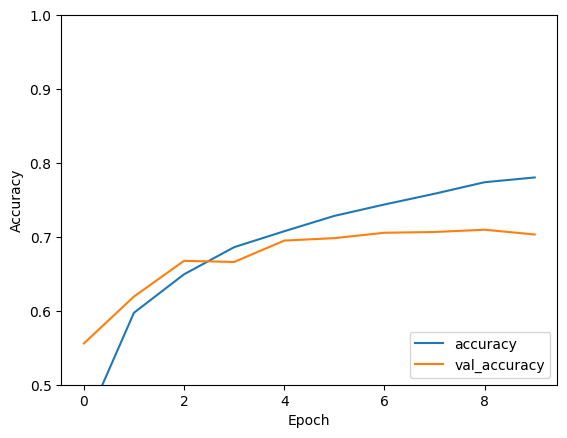

In [ ]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.legend(loc="lower right")

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [ ]:
print(test_acc)


0.7031999826431274


## Let's improve the CNN model

In [ ]:
model = models.Sequential()
model.add(
    layers.Conv2D(
        32, (3, 3), activation="relu", input_shape=(32, 32, 3), padding="same"
    )
)
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

history = model.fit(
    train_images, train_labels, epochs=10, validation_data=(test_images, test_labels)
)

Epoch 1/10


2023-02-27 23:52:34.444744: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 207s 132ms/step - loss: 1.5108 - accuracy: 0.4490 - val_loss: 1.1735 - val_accuracy: 0.5684
Epoch 2/10
1563/1563 [==============================] - 206s 132ms/step - loss: 0.9858 - accuracy: 0.6539 - val_loss: 0.8947 - val_accuracy: 0.6836
Epoch 3/10
1563/1563 [==============================] - 214s 137ms/step - loss: 0.7896 - accuracy: 0.7202 - val_loss: 0.7704 - val_accuracy: 0.7361
Epoch 4/10
1563/1563 [==============================] - 216s 138ms/step - loss: 0.6804 - accuracy: 0.7632 - val_loss: 0.7500 - val_accuracy: 0.7472
Epoch 5/10
1563/1563 [==============================] - 215s 138ms/step - loss: 0.6016 - accuracy: 0.7894 - val_loss: 0.7328 - val_accuracy: 0.7444
Epoch 6/10
1563/1563 [==============================] - 215s 138ms/step - loss: 0.5347 - accuracy: 0.8117 - val_loss: 0.7528 - val_accuracy: 0.7434
Epoch 7/10
1563/1563 [==============================] - 215s 138ms/step - loss: 0.4718 - accuracy: 0.8340 - val_loss: 0.778

313/313 - 6s - loss: 0.8799 - accuracy: 0.7511 - 6s/epoch - 19ms/step


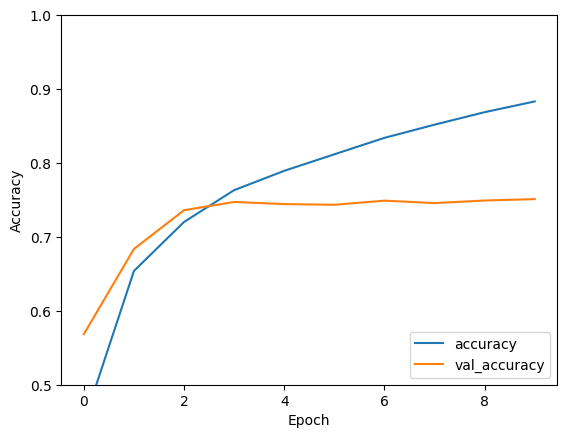

In [ ]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.legend(loc="lower right")

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [ ]:
model = models.Sequential()
model.add(
    layers.Conv2D(
        32, (3, 3), activation="relu", input_shape=(32, 32, 3), padding="same"
    )
)
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

history = model.fit(
    train_images, train_labels, epochs=10, validation_data=(test_images, test_labels)
)

## VGG - 16

# New section

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=4096,activation="relu"))
model.add(layers.Dense(units=4096,activation="relu"))
model.add(layers.Dense(units=2, activation="softmax"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_45 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                 